In [64]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# import dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

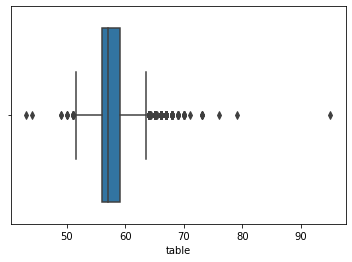

In [67]:
sns.boxplot(x = df_table);
plt.show()

In [68]:
q3 = df_table.quantile(0.75)  
q1 = df_table.quantile(0.25)
print(q3)
print(q1)

59.0
56.0


# Trimming Outliers using IQR Ranges

In [69]:
IQR = q3 - q1
IQR

3.0

In [70]:
lower_limit = q1 - (IQR * 1.5)
lower_limit

51.5

In [71]:
upper_limit = q3 + (IQR * 1.5)
upper_limit

63.5

In [73]:
table_outliers = np.where(df_table > upper_limit, True,
                np.where(df_table < lower_limit, True, False))
table_outliers

array([False, False,  True, ..., False, False, False])

In [86]:
table_without_outliers = df.loc[~(table_outliers)]
table_without_outliers.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [87]:
print(df.shape)
print(table_without_outliers.shape)

(53940, 10)
(53335, 10)


In [88]:
df_table[table_outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [89]:
df_table[table_outliers].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

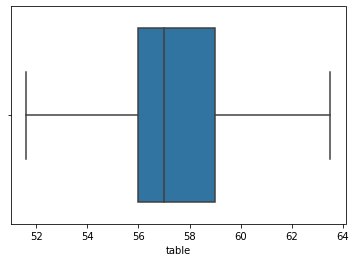

In [91]:
sns.boxplot(x=table_without_outliers['table'])
plt.show()

# Capping Outliers using IQR Ranges

In [96]:
df['table_capped'] = np.where(df['table'] > upper_limit, upper_limit, 
                              np.where(df['table'] < lower_limit, lower_limit, 
                                       df['table']))

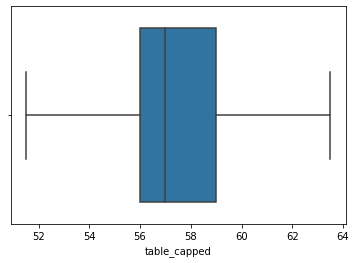

In [97]:
sns.boxplot(x="table_capped", data=df)
plt.show()